<a href="https://colab.research.google.com/github/Jeansds/Curso_Udemy---Deep-Learning-com-Python-de-A-a-Z/blob/master/Classifica%C3%A7%C3%A3o_Img_Digitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D

In [0]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

Text(0.5, 1.0, 'classe4')

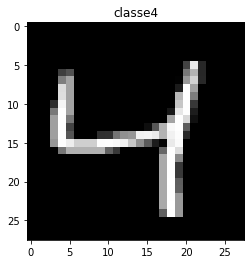

In [11]:
plt.imshow(X_treinamento[2], cmap = 'gray') # somente altera a visualização desta img, porem esse é o objetivo final para todas
plt.title('classe' + str(y_treinamento[2]))

In [0]:
previsores_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 28, 28, 1)
previsores_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)
previsores_treinamento = previsores_treinamento.astype('float32')
previsores_teste = previsores_teste.astype('float32')
previsores_treinamento /= 255 #deixa os valores em escala de 0 a 1
previsores_teste /= 255 # 255 pois cada valor ocupa 1 bit e cada bit vai de 0 a 255 na faixa RGB

In [0]:
classe_treinamento = np_utils.to_categorical(y_treinamento, 10) # variavel dummy
classe_teste = np_utils.to_categorical(y_teste, 10) # variavel dummy

In [15]:
#rede neural
classificador = Sequential()
classificador.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
classificador.add(MaxPooling2D(pool_size = (2, 2)))
classificador.add(Flatten())
classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dense(units = 10, activation = 'softmax'))
classificador.compile(loss = 'categorical_crossentropy',
                      optimizer = 'adam', metrics = ['accuracy'])
classificador.fit(previsores_treinamento, classe_treinamento,
                  batch_size = 128, epochs = 5,
                  validation_data = (previsores_teste, classe_teste))







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/5





60000/60000 [==============================] - 30s 504us/step - loss: 0.2214 - acc: 0.9382 - val_loss: 0.0845 - val_acc: 0.9724
Epoch 2/5
60000/60000 [==============================] - 29s 477us/step - loss: 0.0671 - acc: 0.9803 - val_loss: 0.0546 - val_acc: 0.9814
Epoch 3/5
60000/60000 [==============================] - 29s 475us/step - loss: 0.0458 - acc: 0.9863 - val_loss: 0.0493 - val_acc: 0.9830
Epoch 4/5
60000/60000 [==============================] - 28s 471us/step - loss: 0.0352 - acc: 0.9894 - val_loss: 0.0436 - val_acc: 0.9860
Epoch 5/5
60000/60000 [==============================] - 28s 472us/step - loss: 0.0256 - acc: 0.9927 - val_loss: 0.0441 - val_acc: 0.9851
